# Linear PCA Autoencoder on digits

In [1]:
import pandas as pd     # dataframes
import numpy as np      # numbers and arrays 
import matplotlib.pyplot as plt  # plotting
from sklearn import datasets                            

### Load digits Data 

In [2]:
digits=datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

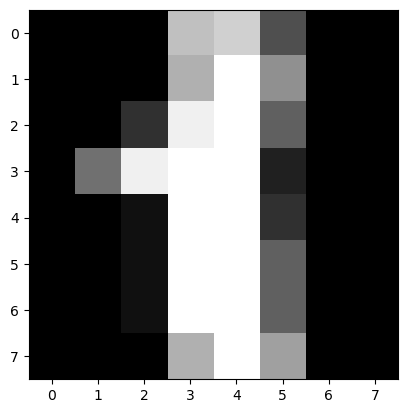

In [3]:
image1=digits['images'][1,:,:]
image1
plt.imshow(image1,cmap='gray')
plt.show()

In [4]:
Df=pd.DataFrame(digits.data,columns=digits.feature_names)
Df['target']=digits.target
Df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [5]:
Df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [6]:
Df_twos=Df.loc[Df['target']==2,:]
Df_twos=Df_twos.iloc[0:100,0:-1]
Df_threes=Df.loc[Df['target']==3,:]
Df_threes=Df_threes.iloc[0:100,0:-1]
Df_fours=Df.loc[Df['target']==4,:]
Df_fours=Df_fours.iloc[0:100,0:-1]
Df_twos.tail()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
956,0.0,1.0,13.0,16.0,7.0,0.0,0.0,0.0,0.0,5.0,...,16.0,5.0,0.0,0.0,8.0,12.0,13.0,16.0,16.0,11.0
959,0.0,0.0,11.0,16.0,7.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,0.0,0.0,13.0,14.0,14.0,16.0,16.0,6.0
977,0.0,1.0,14.0,16.0,12.0,0.0,0.0,0.0,0.0,5.0,...,12.0,2.0,0.0,0.0,11.0,16.0,16.0,16.0,15.0,5.0
979,0.0,0.0,13.0,16.0,11.0,0.0,0.0,0.0,0.0,2.0,...,11.0,5.0,0.0,0.0,9.0,12.0,13.0,16.0,16.0,11.0
986,0.0,3.0,15.0,15.0,3.0,0.0,0.0,0.0,0.0,8.0,...,5.0,0.0,0.0,5.0,16.0,16.0,16.0,16.0,16.0,0.0


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.50)
principalComponents = pca.fit_transform(Df_twos)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2
0,21.887181,-19.116910,-7.942542
1,7.155594,19.660309,-10.674298
2,-0.491736,6.107939,-1.513975
3,19.389941,-21.705349,-1.845982
4,30.162351,-19.489968,-14.027920
...,...,...,...
95,9.116007,19.602757,-11.050143
96,0.754363,17.613129,-5.704959
97,7.754378,15.575015,-4.625564
98,7.627492,17.096826,-7.237535


In [8]:
pca.inverse_transform(principalComponents)

array([[ 6.13008896e-16,  3.92964131e-01,  2.60168122e+00, ...,
         1.40124157e+01,  5.04753090e+00, -3.22555407e-01],
       [-5.52959093e-17,  3.62259704e-01,  7.78856044e+00, ...,
         1.48328480e+01,  1.54948621e+01,  5.61307702e+00],
       [-7.07572297e-17,  6.68696045e-01,  8.99812857e+00, ...,
         1.27421392e+01,  9.54642726e+00,  2.54101349e+00],
       ...,
       [-6.59003046e-17,  1.44028761e-01,  7.06529805e+00, ...,
         1.31711602e+01,  1.26339380e+01,  4.53737824e+00],
       [-5.64750455e-17,  2.37147047e-01,  7.33519551e+00, ...,
         1.38868381e+01,  1.38086037e+01,  4.96727845e+00],
       [-1.81648115e-16,  1.37625374e+00,  1.24561417e+01, ...,
         1.46126027e+01,  1.24226172e+01,  3.28325847e+00]])

In [9]:
inverseDf=pd.DataFrame(pca.inverse_transform(principalComponents))
inverseDf

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,6.130089e-16,0.392964,2.601681,6.089939,12.803906,10.756264,1.186682,2.204498e-16,-1.102249e-16,0.111596,...,1.113808,-0.151666,0.059599,0.685501,2.529829,6.364689,12.217928,14.012416,5.047531,-0.322555
1,-5.529591e-17,0.362260,7.788560,12.647395,4.072103,-0.099762,0.122865,2.962713e-16,-1.481356e-16,4.326224,...,10.359555,2.125208,0.001996,0.336299,6.424051,12.223366,12.057587,14.832848,15.494862,5.613077
2,-7.075723e-17,0.668696,8.998129,14.033678,8.249175,1.314936,0.080621,4.202125e-17,-2.101063e-17,5.194518,...,7.096634,0.924227,0.003549,0.661042,8.867712,14.065788,13.510794,12.742139,9.546427,2.541013
3,5.452192e-16,0.301339,2.790135,7.332486,15.156851,11.034882,1.104328,5.123630e-17,-2.561815e-17,0.684474,...,0.313747,-0.510035,0.057025,0.557640,3.224125,7.813440,12.845435,12.436676,2.589006,-1.259012
4,7.885955e-16,0.247665,0.700626,3.523561,11.816383,12.324173,1.470006,3.893530e-16,-1.946765e-16,-1.470021,...,1.087353,0.107402,0.072294,0.610217,0.093639,3.645533,11.273782,15.401865,6.683648,0.319869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-2.704692e-17,0.276690,7.255605,12.239811,4.257773,0.323987,0.177618,3.067031e-16,-1.533515e-16,4.016228,...,10.309758,2.160677,0.004576,0.257744,5.822966,11.808606,11.901662,14.863398,15.560987,5.692366
96,-1.624145e-16,0.519309,9.193082,14.405622,5.252516,-0.849467,-0.055715,1.583444e-16,-7.917220e-17,5.430334,...,9.843229,1.771872,-0.005469,0.456046,8.348161,14.143509,12.864155,13.715468,13.586171,4.723851
97,-6.590030e-17,0.144029,7.065298,13.181261,7.123256,1.148052,0.147117,1.283852e-16,-6.419259e-17,4.360602,...,9.139374,1.720665,0.004771,0.099664,6.184409,12.989168,12.509678,13.171160,12.633938,4.537378
98,-5.647505e-17,0.237147,7.335196,12.899900,5.860097,0.684880,0.144482,2.008820e-16,-1.004410e-16,4.312663,...,9.608203,1.882165,0.003987,0.202934,6.251592,12.611593,12.311667,13.886838,13.808604,4.967278


## plot numbers

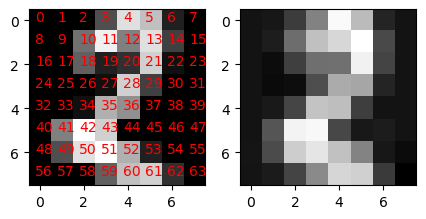

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5, 5))

digit_sample=3

Df_twos_A=np.array(Df_twos.iloc[digit_sample:(digit_sample+1),:])
A = np.reshape(Df_twos_A, (-1, 8))
ax1.imshow(A,cmap='gray')
for j in range(8):
    for i in range(8):
        ax1.text((i-0.2), j+0.05,inverseDf.columns.values[i+8*j],c='red')

Df_twos_B=np.array(inverseDf.iloc[digit_sample:(digit_sample+1),:])
B = np.reshape(Df_twos_B, (-1, 8))
ax2.imshow(B,cmap='gray')
        
plt.show()

## Testing

In [11]:
Df_twos_test=Df.loc[Df['target']==2,:]
Df_two_test=Df_twos_test.iloc[100:101,0:-1]

#Df_four_test=Df.loc[Df['target']==4,:]
#Df_four_test=Df_four_test.iloc[100,0:-1]
Df_two_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1014,0.0,0.0,8.0,12.0,5.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,0.0,0.0,14.0,16.0,16.0,16.0,14.0,0.0


In [12]:
pca.transform(Df_two_test)

array([[ 2.34141013, 14.88043252, -5.734835  ]])

In [13]:
inverseDf_test=pd.DataFrame(pca.inverse_transform(pca.transform(Df_two_test)))
inverseDf_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1.062076e-16,0.50266,8.687793,13.80966,5.871112,0.024722,0.035581,1.591736e-16,-7.958682e-17,5.040542,...,9.186887,1.625415,-0.00066,0.464699,7.907687,13.591288,12.823855,13.698773,12.908476,4.338886


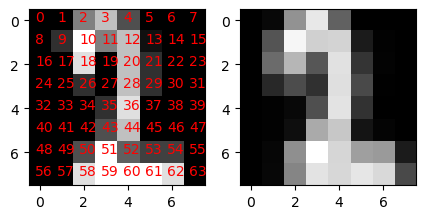

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5, 5))


Df_two_test_A=np.array(Df_two_test)
A = np.reshape(Df_two_test_A, (-1, 8))
ax1.imshow(A,cmap='gray')
for j in range(8):
    for i in range(8):
        ax1.text((i-0.2), j+0.05,inverseDf.columns.values[i+8*j],c='red')

Df_two_test_B=np.array(inverseDf_test)
B = np.reshape(Df_two_test_B, (-1, 8))
ax2.imshow(B,cmap='gray')
        
plt.show()

## Test with a nr 3

In [15]:
Df_three_test=Df.loc[Df['target']==3,:]

threes_sample=3

Df_three_test=Df_three_test.iloc[(100+threes_sample):(101+threes_sample),0:-1]

In [16]:
pca.transform(Df_three_test)

array([[ 4.30694392, -8.0608024 ,  4.23944155]])

In [17]:
inverseDf_test_three=pd.DataFrame(pca.inverse_transform(pca.transform(Df_three_test)))
#inverseDf_test_three

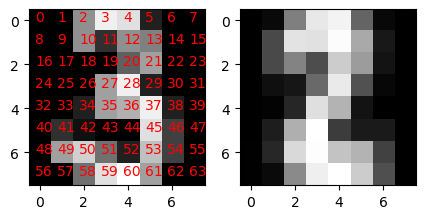

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5, 5))


Df_three_test_A=np.array(Df_three_test)
A = np.reshape(Df_three_test_A, (-1, 8))
ax1.imshow(A,cmap='gray')
for j in range(8):
    for i in range(8):
        ax1.text((i-0.2), j+0.05,inverseDf.columns.values[i+8*j],c='red')

Df_three_test_B=np.array(inverseDf_test_three)
B = np.reshape(Df_three_test_B, (-1, 8))
ax2.imshow(B,cmap='gray')
        
plt.show()

In [21]:
DF_twos_threes=pd.concat([Df_twos,Df_threes])
results

NameError: name 'results' is not defined